In [1]:
!pip install matplotlib

DEPRECATION: Python 3.5 reached the end of its life on September 13th, 2020. Please upgrade your Python as Python 3.5 is no longer maintained. pip 21.0 will drop support for Python 3.5 in January 2021. pip 21.0 will remove support for this functionality.


In [2]:
import matplotlib.pyplot as plt

In [3]:
x = [i for i in range (11)]

In [4]:
print(x)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [5]:
y = [2 * i for i in range(11)]

In [6]:
print (y)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]


Text(0, 0.5, 'y-axis')

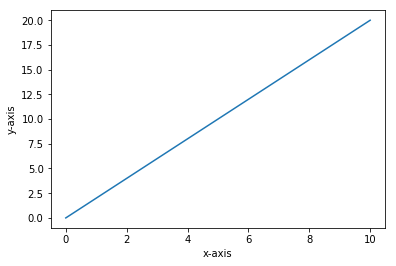

In [7]:
plt.plot(x,y)
plt.xlabel('x-axis')
plt.ylabel('y-axis')

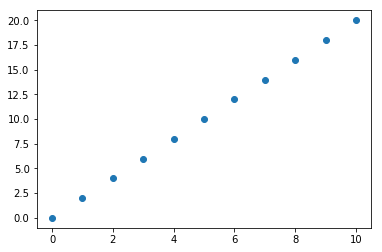

In [8]:
plt.scatter(x,y)

# Car Evaluation Data Set Example (https://archive.ics.uci.edu/ml/datasets/car+evaluation)

Data Set Information:

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

CAR car acceptability
. PRICE overall price
. . buying buying price
. . maint price of the maintenance
. TECH technical characteristics
. . COMFORT comfort
. . . doors number of doors
. . . persons capacity in terms of persons to carry
. . . lug_boot the size of luggage boot
. . safety estimated safety of the car

Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples (for these examples sets see [Web Link]).

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.


Attribute Information:

Class Values:

unacc, acc, good, vgood

Attributes:

buying: vhigh, high, med, low.
maint: vhigh, high, med, low.
doors: 2, 3, 4, 5more.
persons: 2, 4, more.
lug_boot: small, med, big.
safety: low, med, high.


In [9]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [10]:
data = pd.read_csv('car.csv')
data.head(60)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [11]:
x = data[['buying', 'maint', 'doors', 'persons', 'safety']].values
y = data[['class']]

print(x,y)

# Converting [x] the data since attributes are strings and ML needs numbers

le = LabelEncoder()
for i in range(len(x[0])):
    x[:, i] = le.fit_transform(x[:, i])
    
print(x) 

[['vhigh' 'vhigh' '2' '2' 'low']
 ['vhigh' 'vhigh' '2' '2' 'med']
 ['vhigh' 'vhigh' '2' '2' 'high']
 ...
 ['low' 'low' '5more' 'more' 'low']
 ['low' 'low' '5more' 'more' 'med']
 ['low' 'low' '5more' 'more' 'high']]       class
0     unacc
1     unacc
2     unacc
3     unacc
4     unacc
5     unacc
6     unacc
7     unacc
8     unacc
9     unacc
10    unacc
11    unacc
12    unacc
13    unacc
14    unacc
15    unacc
16    unacc
17    unacc
18    unacc
19    unacc
20    unacc
21    unacc
22    unacc
23    unacc
24    unacc
25    unacc
26    unacc
27    unacc
28    unacc
29    unacc
...     ...
1698  unacc
1699   good
1700  vgood
1701  unacc
1702  unacc
1703  unacc
1704  unacc
1705  unacc
1706  unacc
1707  unacc
1708  unacc
1709  unacc
1710  unacc
1711    acc
1712   good
1713  unacc
1714   good
1715  vgood
1716  unacc
1717   good
1718  vgood
1719  unacc
1720    acc
1721   good
1722  unacc
1723   good
1724  vgood
1725  unacc
1726   good
1727  vgood

[1728 rows x 1 columns]
[[3 3 0 0 1]
 [3

In [12]:
# Converting [y] i.e. class

label_mapping = {'unacc':0,
                 'acc':1,
                 'good':2,
                 'vgood':3
                }

y['class'] = y['class'].map(label_mapping)
y = np.array(y)
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [2]
 [3]]


/Users/ba/opt/anaconda3/envs/312fintech/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [13]:
# Create Model between train and testing data sets

knn = neighbors.KNeighborsClassifier(n_neighbors=25, weights='uniform')

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [14]:
knn.fit(x_train, y_train)

/Users/ba/opt/anaconda3/envs/312fintech/lib/python3.5/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [15]:
# Make Predictions

prediction = knn.predict(x_test)
accuracy = metrics.accuracy_score(y_test, prediction)
print('predictions: ', prediction)
print('accuracy: ', accuracy)



predictions:  [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 3 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 3 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0
 1 0 0 1 0 0 0 3 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 3 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 3 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 

In [16]:
# Print 20th index value to confirm model seems to be working

print ('actual value: ', y[20])
print ('predicted value ', knn.predict(x)[20])

actual value:  [0]
predicted value  0


In [17]:
# Print a

a = 1700
print ('actual value: ', y[a])
print ('predicted value ', knn.predict(x)[a])

actual value:  [3]
predicted value  3


# Support Vector Machine Example

https://archive.ics.uci.edu/ml/datasets/iris



In [34]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [25]:
# Load dataset

iris = datasets.load_iris()

In [33]:
# Split it in features and labels

x = iris.data
y = iris.target

classes = ['Iris Setosa', 'Iris Versicolour' , 'Iris Virginica']

print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [31]:
# Set 80% train and 20% test

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

# Select Model
model = svm.SVC()
model.fit(x_train, y_train)

In [36]:
# Print Model

print(model)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [46]:
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)

print('prediction: ', prediction)
print('actual: ', y_test)
print('accuracy: ', accuracy)

prediction:  [1 0 2 0 0 0 1 2 1 2 1 2 2 2 1 2 0 2 0 2 1 2 2 1 0 1 1 0 2 1]
actual:  [1 0 2 0 0 0 1 2 1 2 1 2 2 2 1 2 0 2 0 2 1 2 1 1 0 1 1 0 2 1]
accuracy:  0.9666666666666667


In [51]:
# for loop showing actual flower type from prediction
for i in range(len(prediction)):
    print(classes[prediction[i]])

Iris Versicolour
Iris Setosa
Iris Virginica
Iris Setosa
Iris Setosa
Iris Setosa
Iris Versicolour
Iris Virginica
Iris Versicolour
Iris Virginica
Iris Versicolour
Iris Virginica
Iris Virginica
Iris Virginica
Iris Versicolour
Iris Virginica
Iris Setosa
Iris Virginica
Iris Setosa
Iris Virginica
Iris Versicolour
Iris Virginica
Iris Virginica
Iris Versicolour
Iris Setosa
Iris Versicolour
Iris Versicolour
Iris Setosa
Iris Virginica
Iris Versicolour
